# Homework 7: 

**DUE:** 5pm EST, April 30, 2020

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in class and the _ILSR_ Chapter 8. The second approach is to classify based on the average probability. What is the final classification under each of these two approaches? What does the difference in classification aggregation (if any) tell us about tree approaches?

**Answer:**
The majority vote approach makes a prediction based on the majority of the estimates (like a democracy) and weighs each probability equally, so outliers don't exert a greater influence on the outcome. If probabilities greater than .5 correspond to a red class, then the final classification under this approach is red. The average probability makes a prediction by calculating the mean of the estimates, which means extreme values have a greater influence on the final prediction. Under this approach, the classification would be green because the average probability is .445.

---
2. Explain why out of bag (OOB) error provides a more reliable estimate of model test error than a more traditional hold out test set approach. 

**Answer:**
The OOB is calculated by evaluating the hold out test accuracy of all models that are generated during sampling. On average, 1/3 of the total sample size is used to calculate a test set on each pull. Thus, the OOB provides better predictive fits.

---

### **Applied:** Show your code & plots

We will use the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

You will need to have the "tidyverse", "tree" and "randomForest" packages installed to answer these problems.


3. Use trees methods to predict unadjusted Flanker task (Flanker_Unadj) performance using a set of demographic, neural, and other cognitive factors. 


(a) Start by loading the HCP data and get a cleaned and tidy data table containing only Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, Relational_Task_Acc as our variables of interest.

In [1]:
# -------------------------------
# Question 3
# -------------------------------

# (a)

library(tidyverse)
library(randomForest) 
library(tree) 

setwd('/Users/shirleyduong/Desktop/Duong_DSPN_S20')
d<-read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")%>%
  select(Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, 
         WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, 
         PosAffect_Unadj, Relational_Task_Acc) %>% na.omit()


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 



(b) Fit a regression tree model with Flanker_Unadj as the response variable and all others as predictor variables. Prune your tree to find the best model fit using as few terminal nodes as possible and show that the model fit improves after pruning. Plot your tree, plot tree size versues model deviance, determine the test accuracy on a hold out test set, and show a pruned model performance.



Regression tree:
tree(formula = Flanker_Unadj ~ ., data = d, subset = train)
Variables actually used in tree construction:
[1] "WM_Task_Acc"       "Dexterity_Unadj"   "FS_Total_GM_Vol"  
[4] "Age"               "Language_Task_Acc"
Number of terminal nodes:  9 
Residual mean deviance:  84.79 = 43240 / 510 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-24.75000  -6.04900   0.01852   0.00000   5.86700  29.57000 

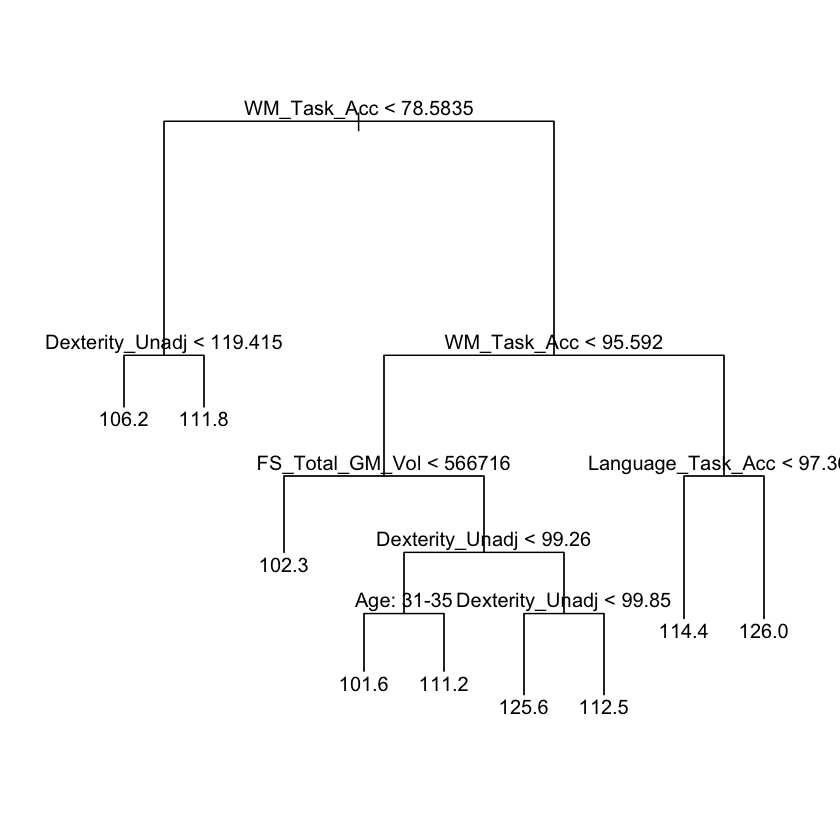

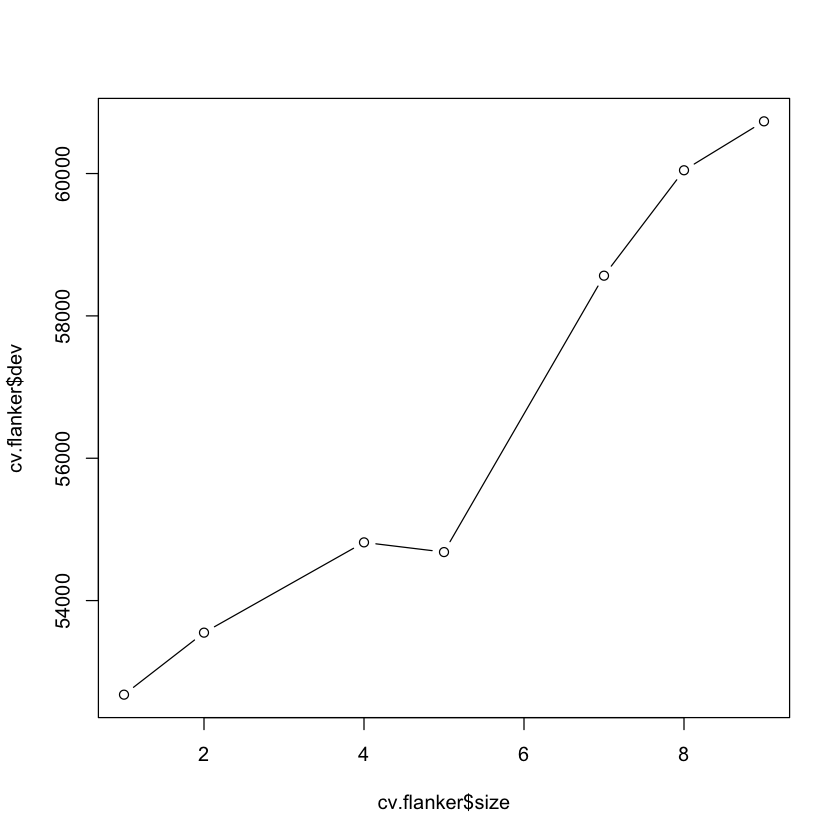

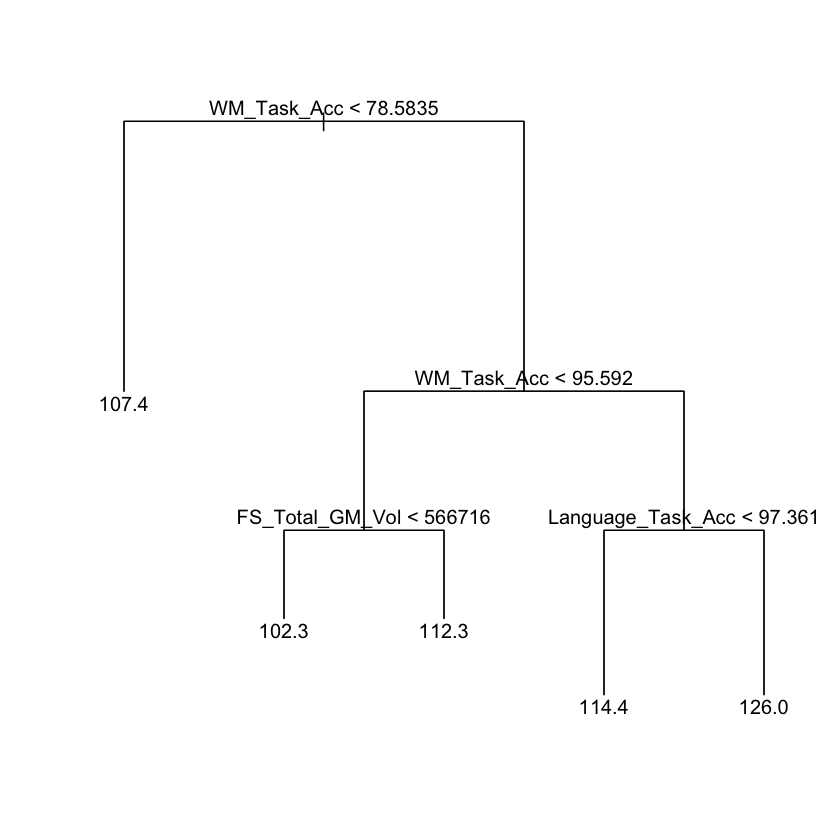

[1] 103.1969

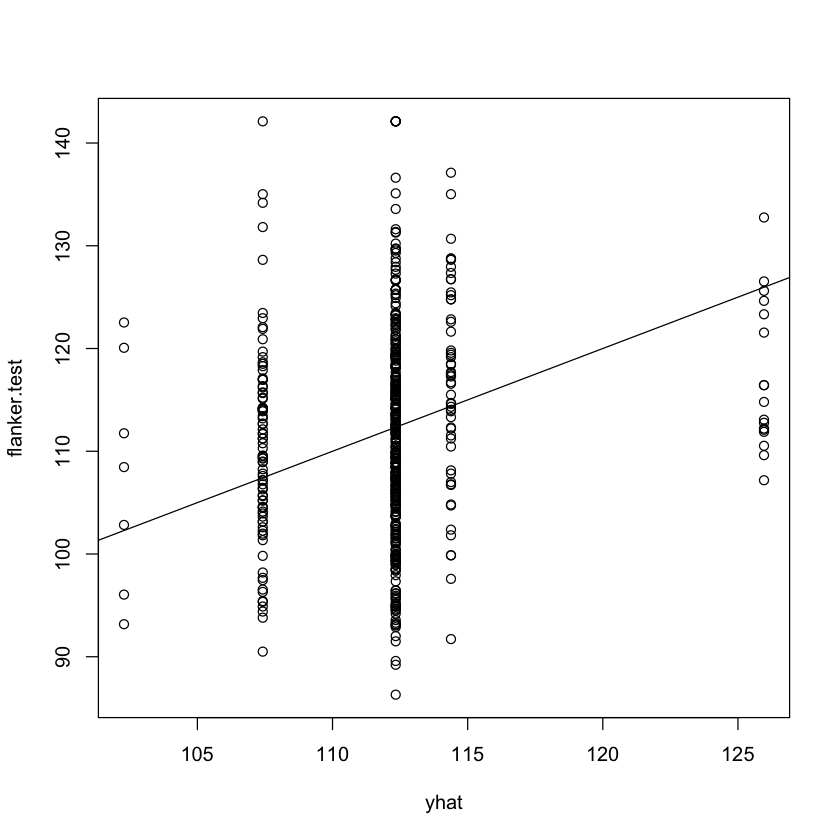

In [3]:
# (b)

set.seed(1)
train = sample(1: nrow(d), nrow(d)/2) #training set
flanker.tree=tree(Flanker_Unadj~.,d, subset=train) #fit the regression tree
summary(flanker.tree) #summarize

plot(flanker.tree)
text(flanker.tree, pretty=0)

cv.flanker=cv.tree(flanker.tree) 
plot(cv.flanker$size, cv.flanker$dev,type='b') #plot suggests that we should prune the tree

flanker.pruned=prune.tree(flanker.tree,best=5) #prune the regression tree
plot(flanker.pruned) #plot the newly pruned tree
text(flanker.pruned, pretty=0)

yhat=predict(flanker.pruned,newdata=d[-train ,])
flanker.test=d[-train, "Flanker_Unadj"]
plot(yhat, flanker.test)
abline(0,1)
mean((yhat-flanker.test)^2)

4. Use the same data table to fit a classification tree with gender as the response variable and all others as predictor variables. Prune your tree and find the best model fit using as few terminal nodes as possible, and show that your model fit improves after pruning. Evaluate your model using a hold out test sample.


[1] "size"   "dev"    "k"      "method"

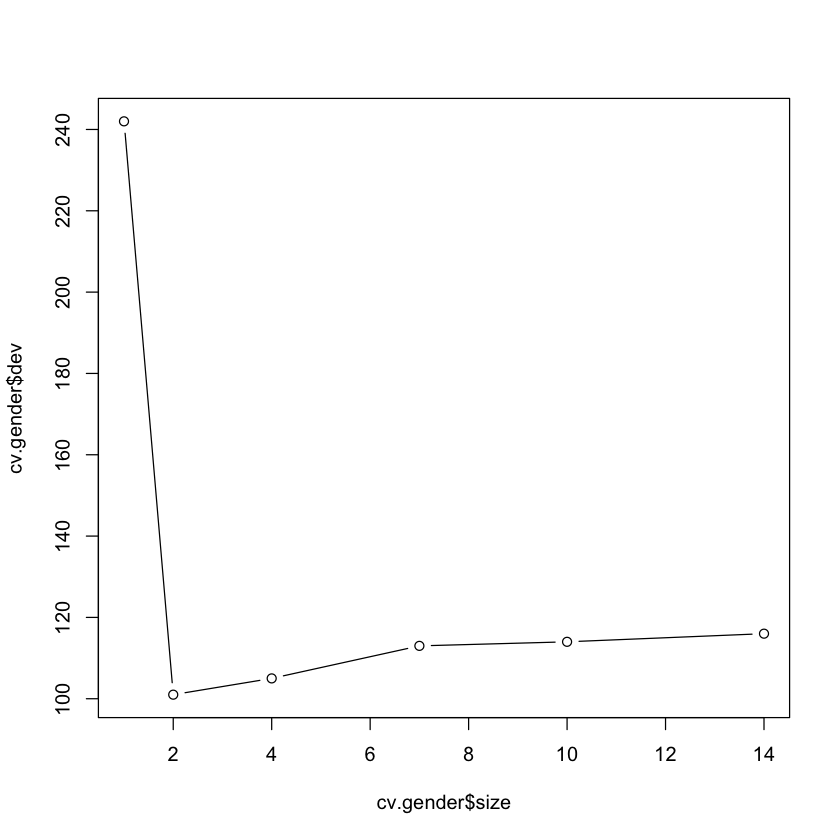

           gender.test
gender.pred   F   M
          F 242  69
          M  36 173

[1] 0.7980769

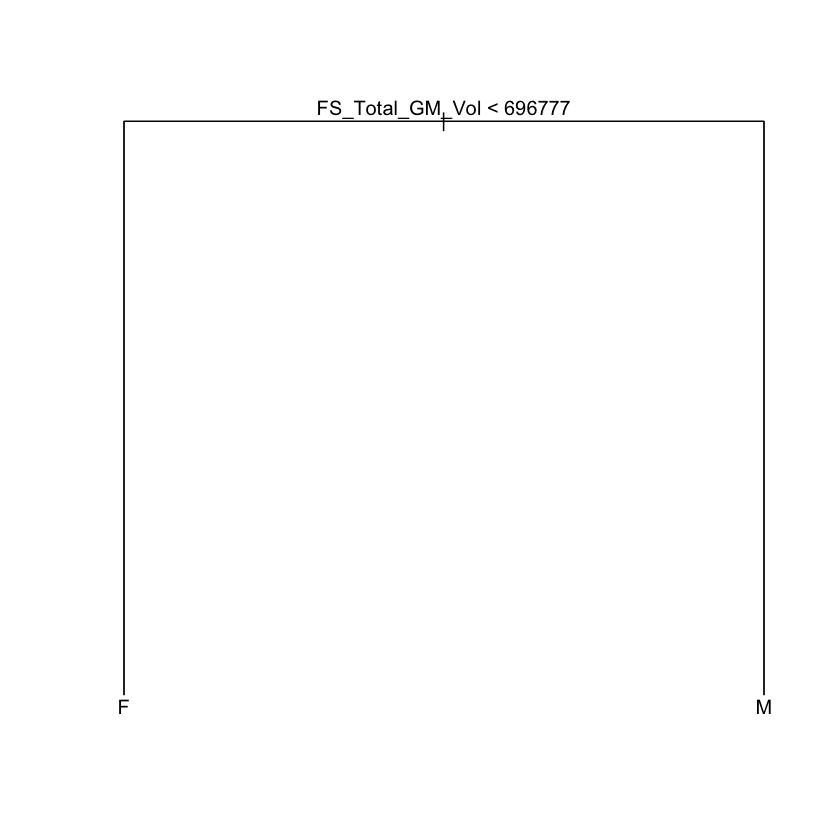

In [6]:
# -------------------------------
# Question 4
# -------------------------------

d$Gender<-as.factor(d$Gender)

set.seed(5) #reset seed
idx = 1:nrow(d)
train=sample(idx, 519) #training set
test=d[-train,] #test set
gender.tree <- tree(Gender~., d, subset=train)

cv.gender = cv.tree(gender.tree, FUN=prune.misclass) 
names(cv.gender)
plot(cv.gender$size ,cv.gender$dev ,type="b")

gender.pruned=prune.misclass(gender.tree,best=2) #tuned model
plot(gender.pruned) #plotting the newly pruned tree
text(gender.pruned, pretty=0)

gender.test=d[-train, "Gender"] #get test data
gender.pred=predict(gender.pruned, test, type="class")
table(gender.pred, gender.test) #compare predictions with test data

total_accuracy = (242 + 173) / length(gender.test) 
total_accuracy



5. Use the same data table to fit a random forest model for the classification task with m = 3 Check test accuracy and visualize feature importance for classfying gender.  


Call:
 randomForest(formula = Gender ~ ., data = d, mtry = 3, bimportance = TRUE,      subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 20.42%
Confusion matrix:
    F   M class.error
F 224  53   0.1913357
M  53 189   0.2190083

       gender.test
yhat.rf   F   M
      F 241  70
      M  37 172

[1] 0.7942308

,MeanDecreaseGini
Age,5.862239
Flanker_Unadj,16.033211
FS_Tot_WM_Vol,57.242134
FS_Total_GM_Vol,82.425811
WM_Task_Acc,15.692921
ReadEng_Unadj,16.816427
Language_Task_Acc,12.142231
Dexterity_Unadj,24.337469
PosAffect_Unadj,11.820176
Relational_Task_Acc,15.551023


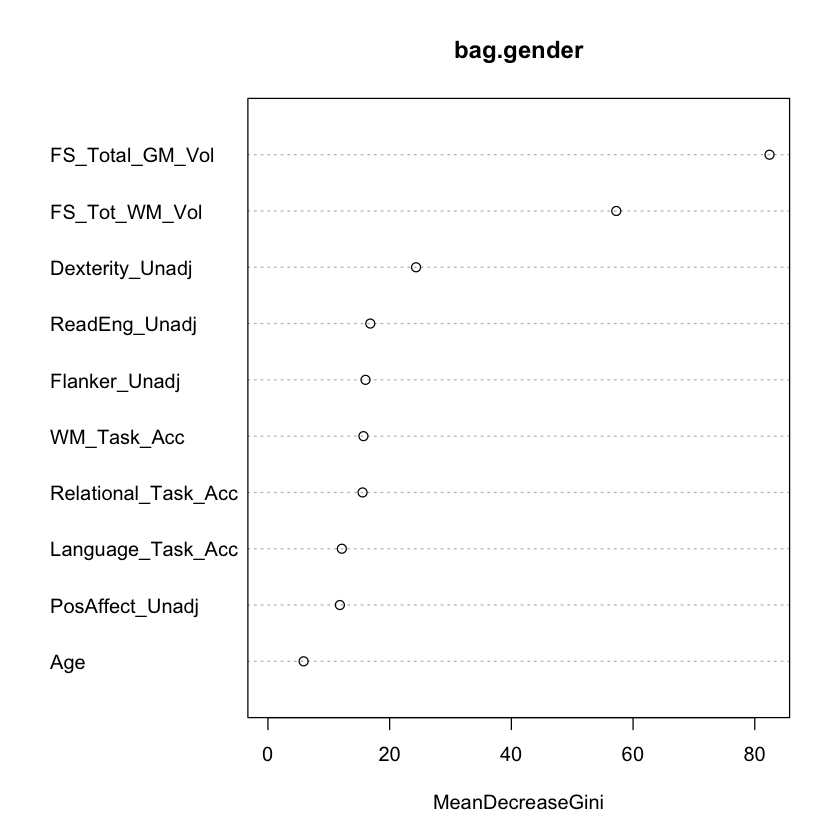

In [8]:
# -------------------------------
# Question 5
# -------------------------------

set.seed(4)
bag.gender=randomForest(Gender~.,data=d, subset=train, mtry=3,bimportance=TRUE)
bag.gender

#test accuracy
gender.test=d[-train, "Gender"]
yhat.rf = predict(bag.gender, newdata=d[-train ,])
table(yhat.rf, gender.test)
total_rf_accuracy = (241+172)/length(gender.test) 
total_rf_accuracy

#list importance of each feature
importance(bag.gender)
varImpPlot(bag.gender)



